In [54]:
import yfinance as yf
import pandas as pd
import requests
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def download_yfinance_data(tickers, start_date, end_date):
    """
    Download historical stock data from Yahoo Finance for the given tickers and date range.
    Combine all data into a single DataFrame with a fixed daily index.
    """
    date_dataframe = pd.DataFrame(pd.date_range(start=start_date, end=end_date, freq='D'), columns=['Date'])

    for ticker in tqdm(tickers):
        try:
            data_ticker = yf.download(ticker, start=start_date, end=end_date, multi_level_index=False)
            if not data_ticker.empty:
                data_extract = data_ticker[['Adj Close']].rename(columns={'Adj Close': ticker})
                date_dataframe = date_dataframe.merge(data_extract, left_on='Date', right_index=True, how='left')
        except Exception as e:
            print(f"Error for {ticker}: {e}")

    return date_dataframe

In [3]:
def get_all_tickers():
    # API URL
    url = "https://api.nasdaq.com/api/screener/stocks?tableonly=true&download=true"
    # Headers (User-Agent is required to avoid access restrictions)
    headers = {"User-Agent": "Mozilla/5.0"}

    # Fetch data from the API
    response = requests.get(url, headers=headers)
    data = response.json()

    # Extract relevant rows
    rows = data.get("data", {}).get("rows", [])

    # Create DataFrame
    df_result = pd.DataFrame(rows, columns=["symbol", "name", "country", "ipoyear", "industry"])

    # Display the first few rows
    return df_result

In [4]:
df_all_tickers = get_all_tickers() #6898

In [29]:
start_date = "2024-01-01"
end_date = "2024-12-31"
tickers = df_all_tickers['symbol'].to_list()  # Example tickers
# tickers = ['AAPL','MSFT','GOOGL']

df = download_yfinance_data(tickers, start_date, end_date)

if df is not None:
    df.to_csv("yfinance_data.csv")
    print("Data successfully downloaded and saved to yfinance_data.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AACBU']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2024-01-01 -> 2024-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1704085200, endDate = 1735621200")')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*****************

Data successfully downloaded and saved to yfinance_data.csv


In [41]:
df = df.set_index('Date')
df_clean = df.dropna(axis=1, thresh=int(len(df.index)/2), inplace=False)
# df_filled = df_clean.interpolate(method='linear')
# c = df_filled.corr().abs()
c = df_clean.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False).reset_index()
so.columns = ['ticker_1', 'ticker_2', 'correlation']
so.to_csv('ticker_correlations.zip')

In [45]:
so[so['correlation']<1]


,ticker_1,ticker_2,correlation
5849,GOOG,GOOGL,9.998775e-01
5850,GOOGL,GOOG,9.998775e-01
5851,Z,ZG,9.996841e-01
5852,ZG,Z,9.996841e-01
5853,BNT,BN,9.995879e-01
...,...,...,...
34210576,LPTX,RLMD,1.135180e-07
34210577,COLL,PRM,6.019304e-08
34210578,PRM,COLL,6.019304e-08
34210579,ANGI,NUKKW,4.311709e-08


In [47]:

wiki_data=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies') # Open the link and download S&P company details in a table
data = wiki_data[0] # All data is stored in first cell
display(data.head()) # print to check data downloaded
sorted_data = data.sort_values(by=['Symbol'], ascending=True) # Sort the dataframe on ticker in alphabetical ascending order
# Convert the dataframe to csv file
sorted_data.to_csv('S&P500Tickers.csv', mode='w', index=False) #index is False as we don't want to write index in csv file
sorted_data

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999
39,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
11,ABNB,Airbnb,Consumer Discretionary,"Hotels, Resorts & Cruise Lines","San Francisco, California",2023-09-18,1559720,2008
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969


In [48]:
# Analysis on snp500 only
start_date = "2024-01-01"
end_date = "2024-12-31"
tickers = sorted_data['Symbol'].to_list()  # Example tickers
# tickers = ['AAPL','MSFT','GOOGL']

df = download_yfinance_data(tickers, start_date, end_date)

if df is not None:
    df.to_csv("yfinance_snp500_data.csv")
    print("Data successfully downloaded and saved to yfinance_data.csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Data successfully downloaded and saved to yfinance_data.csv


In [49]:
df = df.set_index('Date')
df_clean = df.dropna(axis=1, thresh=int(len(df.index)/2), inplace=False)
# df_filled = df_clean.interpolate(method='linear')
# c = df_filled.corr().abs()
c = df_clean.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False).reset_index()
so.columns = ['ticker_1', 'ticker_2', 'correlation']
so.to_csv('snp500_correlations.zip')

In [51]:
so[so['correlation']<1]

,ticker_1,ticker_2,correlation
499,GOOGL,GOOG,9.998775e-01
500,GOOG,GOOGL,9.998775e-01
501,FOX,FOXA,9.987621e-01
502,FOXA,FOX,9.987621e-01
503,PPL,EVRG,9.920720e-01
...,...,...,...
248996,SJM,FFIV,9.334130e-06
248997,MPC,CZR,3.119843e-06
248998,CZR,MPC,3.119843e-06
248999,TMUS,XYL,6.134538e-07


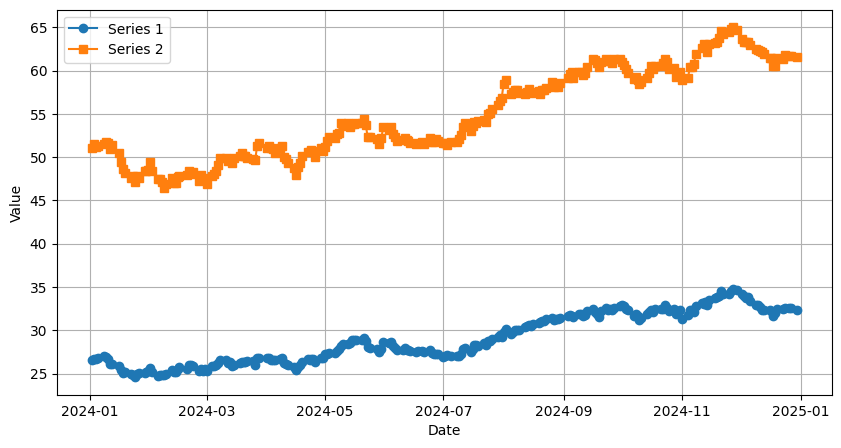

In [55]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["PPL"], marker="o", label="Series 1")
plt.plot(df.index, df["EVRG"], marker="s", label="Series 2")

# Formatting
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

# Show plot
plt.show()